In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
MOVIELENS_DIR = ''
USER_DATA_FILE = 'users.dat'
MOVIE_DATA_FILE = 'movies.dat'
RATING_DATA_FILE = 'ratings.dat'

In [4]:
# Define csv files to be saved into
USERS_CSV_FILE = 'users.csv'
MOVIES_CSV_FILE = 'movies.csv'
RATINGS_CSV_FILE = 'ratings.csv'

In [5]:
# Read the Ratings File
ratings = pd.read_csv(os.path.join(MOVIELENS_DIR, RATING_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])
users = pd.read_csv(os.path.join(MOVIELENS_DIR, USER_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
movies = pd.read_csv(os.path.join(MOVIELENS_DIR, MOVIE_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])

In [6]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
data = pd.merge(ratings,movies,on='movie_id')
data.sample(20)

,user_id,movie_id,rating,timestamp,title,genres
184502,5600,1641,4,959461543,"Full Monty, The (1997)",Comedy
82048,4345,3108,5,966267459,"Fisher King, The (1991)",Comedy|Drama|Romance
143953,5103,1917,5,962343404,Armageddon (1998),Action|Adventure|Sci-Fi|Thriller
889231,621,2328,4,975799353,Vampires (1998),Horror
321961,2157,357,4,974621594,Four Weddings and a Funeral (1994),Comedy|Romance
23370,302,1270,5,976504638,Back to the Future (1985),Comedy|Sci-Fi
116895,744,480,4,975469238,Jurassic Park (1993),Action|Adventure|Sci-Fi
520895,2594,2948,4,973817247,From Russia with Love (1963),Action
403863,5307,1356,5,960936745,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi
803949,2246,3836,1,981394155,Kelly's Heroes (1970),Action|Comedy|War


In [9]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
df = pd.merge(data,users,on='user_id')
data.sample(20)

,user_id,movie_id,rating,timestamp,title,genres
870652,4386,2468,1,965247444,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller
251398,3501,50,5,966997000,"Usual Suspects, The (1995)",Crime|Thriller
27827,5169,527,5,961890962,Schindler's List (1993),Drama|War
789765,409,2459,4,976291099,"Texas Chainsaw Massacre, The (1974)",Horror
561922,2383,1288,5,974324003,This Is Spinal Tap (1984),Comedy|Drama|Musical
106721,4579,982,3,996349625,Picnic (1955),Drama
593106,2057,3798,4,987257196,What Lies Beneath (2000),Thriller
697179,2907,3208,2,971820519,Loaded Weapon 1 (1993),Action|Comedy
833461,5066,2380,1,962474340,Police Academy 3: Back in Training (1986),Comedy
136033,287,593,5,976568803,"Silence of the Lambs, The (1991)",Drama|Thriller


In [11]:
# timestamp
from datetime import datetime

df['timestamp_new'] =pd.to_datetime(df['timestamp'], unit='s')
#df['timestamp_new']

In [12]:
df['year'] = df['timestamp_new'].dt.year
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode,timestamp_new,year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,2000-12-31 22:12:40,2000
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,2000-12-31 22:35:09,2000
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,2000-12-31 22:32:48,2000
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,2000-12-31 22:04:35,2000
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,2001-01-06 23:38:11,2001


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        1000209 non-null  int64         
 1   movie_id       1000209 non-null  int64         
 2   rating         1000209 non-null  int64         
 3   timestamp      1000209 non-null  int64         
 4   title          1000209 non-null  object        
 5   genres         1000209 non-null  object        
 6   gender         1000209 non-null  object        
 7   age            1000209 non-null  int64         
 8   occupation     1000209 non-null  int64         
 9   zipcode        1000209 non-null  object        
 10  timestamp_new  1000209 non-null  datetime64[ns]
 11  year           1000209 non-null  int64         
 12  genre_0        1000209 non-null  object        
 13  genre_1        689510 non-null   object        
 14  genre_2        304986 non-null   o

In [14]:
x = df['user_id'].value_counts();

In [15]:
users = x.index[:]
counts = x.iloc[:]

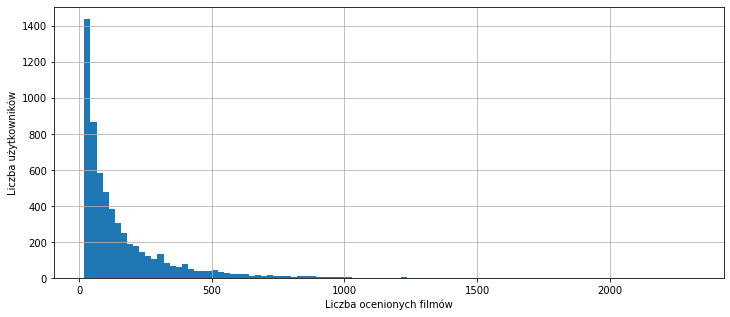

In [16]:
plt.figure(figsize=(12,5))
plt.hist(counts, 100)
plt.xlabel('Liczba ocenionych filmów')
plt.ylabel('Liczba użytkowników')
plt.title('')
plt.grid(True)
plt.show()

In [17]:
y = df['rating'].value_counts();
ratings = y.index[:]
rating_counts = y.iloc[:]

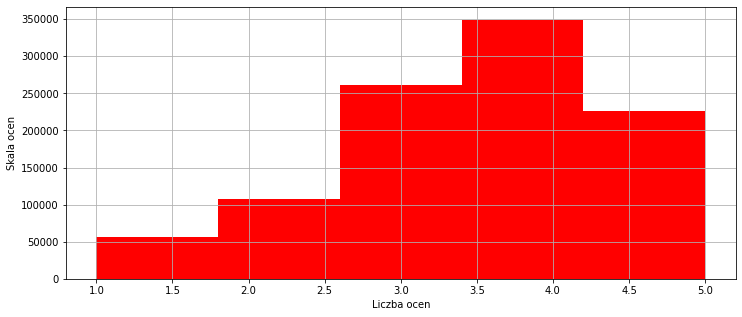

In [18]:
plt.figure(figsize=(12,5))
plt.hist(df['rating'], 5, facecolor='r')
plt.xlabel('Liczba ocen')
plt.ylabel('Skala ocen')
plt.title('')
plt.grid(True)
plt.show()

In [19]:
df_category = df["genres"].str.split('|', expand=True)


Text(0, 0.5, 'Number of ratings')

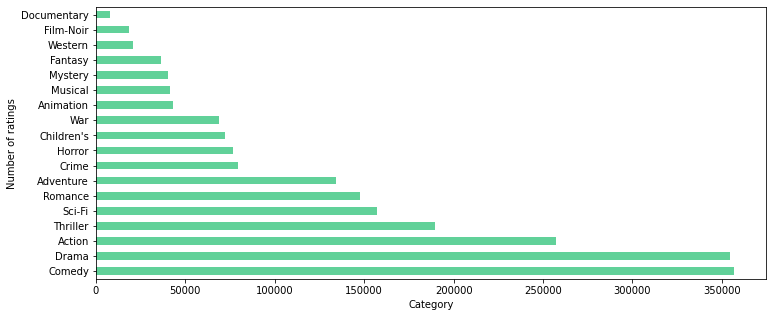

In [20]:
df_category.stack().value_counts().plot(kind='barh', figsize=(12,5), color="#61d199", )
plt.xlabel('Category')
plt.ylabel('Number of ratings')

In [21]:
df['genres'] = df['genres'].str.split('|')
#df['genres'] = df['genres'].fillna("").astype('str')

In [22]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode,timestamp_new,year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),[Drama],F,1,10,48067,2000-12-31 22:12:40,2000
1,1,661,3,978302109,James and the Giant Peach (1996),"[Animation, Children's, Musical]",F,1,10,48067,2000-12-31 22:35:09,2000
2,1,914,3,978301968,My Fair Lady (1964),"[Musical, Romance]",F,1,10,48067,2000-12-31 22:32:48,2000
3,1,3408,4,978300275,Erin Brockovich (2000),[Drama],F,1,10,48067,2000-12-31 22:04:35,2000
4,1,2355,5,978824291,"Bug's Life, A (1998)","[Animation, Children's, Comedy]",F,1,10,48067,2001-01-06 23:38:11,2001


In [23]:
genres = df['genres'].apply(pd.Series)
genres = genres.rename(columns = lambda x : 'genre_' + str(x))

In [25]:
df = pd.concat([df[:], genres[:]], axis=1)

In [26]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode,timestamp_new,year,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),[Drama],F,1,10,48067,2000-12-31 22:12:40,2000,Drama,NaN,NaN,NaN,NaN,NaN
1,1,661,3,978302109,James and the Giant Peach (1996),"[Animation, Children's, Musical]",F,1,10,48067,2000-12-31 22:35:09,2000,Animation,Children's,Musical,NaN,NaN,NaN
2,1,914,3,978301968,My Fair Lady (1964),"[Musical, Romance]",F,1,10,48067,2000-12-31 22:32:48,2000,Musical,Romance,NaN,NaN,NaN,NaN
3,1,3408,4,978300275,Erin Brockovich (2000),[Drama],F,1,10,48067,2000-12-31 22:04:35,2000,Drama,NaN,NaN,NaN,NaN,NaN
4,1,2355,5,978824291,"Bug's Life, A (1998)","[Animation, Children's, Comedy]",F,1,10,48067,2001-01-06 23:38:11,2001,Animation,Children's,Comedy,NaN,NaN,NaN
